In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()         #uploading the dataset

Saving solarpowergeneration.csv to solarpowergeneration.csv


# **EDA**

In [3]:
data = pd.read_csv("solarpowergeneration.csv")       #reading the dataset

In [4]:
data.head()       #showing the first few rows of the dataset

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
data.sample(5)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
1966,0.496999,61,20,8.1,3,9.0,90,11.0,30.01,404
2447,0.664399,61,29,14.4,2,10.0,83,15.0,29.98,0
2316,0.055242,62,26,14.0,3,10.0,70,17.0,29.95,30530
1091,0.133672,56,13,3.2,1,10.0,51,9.0,30.17,12969
2006,0.491103,58,28,16.8,3,9.0,75,24.0,29.96,1229


In [6]:
data.shape   #asking how large the dataset is. i.e., getting to know the number of rows and columns.

(2920, 10)

In [7]:
#renaming the column names(converting the dash sign to underscore)
data = data.rename(columns={
    'power-generated': 'power_generated',
    'sky-cover': 'sky_cover',
    'distance-to-solar-noon': 'distance_to_solar_noon',
    'wind-direction': 'wind_direction',
    'wind-speed': 'wind_speed',
    'average-wind-speed-(period)': 'average_wind_speed_period',
    'average-pressure-(period)': 'average_pressure_period'
})
data.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated'],
      dtype='object')

In [8]:
#sky_cover column seems to a categorical variable but the values are treated as integer one.
#we would be converting the sky_cover variable into a categorical variable
data = data.astype({'sky_cover':'category'})
data.dtypes

,0
distance_to_solar_noon,float64
temperature,int64
wind_direction,int64
wind_speed,float64
sky_cover,category
visibility,float64
humidity,int64
average_wind_speed_period,float64
average_pressure_period,float64
power_generated,int64


In [9]:
data.describe()  #the describe function doesn't work for the categorical variables, so sky_cover won't be included here.

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   distance_to_solar_noon     2920 non-null   float64 
 1   temperature                2920 non-null   int64   
 2   wind_direction             2920 non-null   int64   
 3   wind_speed                 2920 non-null   float64 
 4   sky_cover                  2920 non-null   category
 5   visibility                 2920 non-null   float64 
 6   humidity                   2920 non-null   int64   
 7   average_wind_speed_period  2919 non-null   float64 
 8   average_pressure_period    2920 non-null   float64 
 9   power_generated            2920 non-null   int64   
dtypes: category(1), float64(5), int64(4)
memory usage: 208.5 KB


In [11]:
data.isnull().sum()  #checking if there's any null value in the dataset

,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
sky_cover,0
visibility,0
humidity,0
average_wind_speed_period,1
average_pressure_period,0
power_generated,0


since thers's a null value in the column 'average_wind_speed_(period)', we would replace it with median.

In [12]:
median = data['average_wind_speed_period'].median()  #change it to median

In [13]:
median

9.0

In [14]:
data['average_wind_speed_period'].fillna(median,inplace = True)    #operating the null values using the median of that certain column

<ipython-input-14-5abaedbac4d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['average_wind_speed_period'].fillna(median,inplace = True)    #operating the null values using the median of that certain column


In [15]:
data.isnull().sum()    #checking if there's any null value in the dataset after the imputation

,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
sky_cover,0
visibility,0
humidity,0
average_wind_speed_period,0
average_pressure_period,0
power_generated,0


after filling the missing place with the median value, there isn't any null values in the dataset

In [16]:
data.corr()  #here's the correlation matrix presenting the relationships that dimensions share with each other, proving the importance of them in the dataset

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
distance_to_solar_noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214869,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054556,-0.435723,0.132193
wind_direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229805,-0.272405,0.146788
wind_speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673441,-0.379752,0.142641
sky_cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044300,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143437,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.218037,0.018489,-0.522545
average_wind_speed_period,-0.214869,0.054556,0.229805,0.673441,0.044300,0.143437,-0.218037,1.000000,-0.293458,0.278188
average_pressure_period,0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293458,1.000000,-0.036771
power_generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278188,-0.036771,1.000000


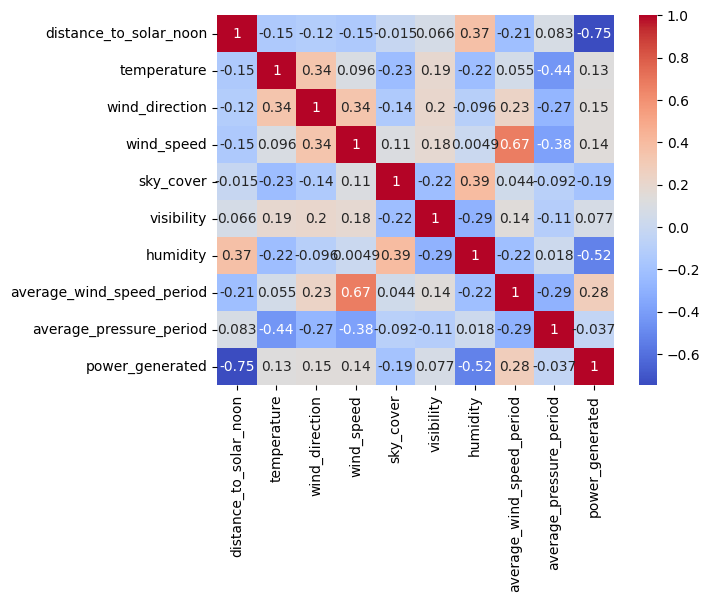

In [17]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

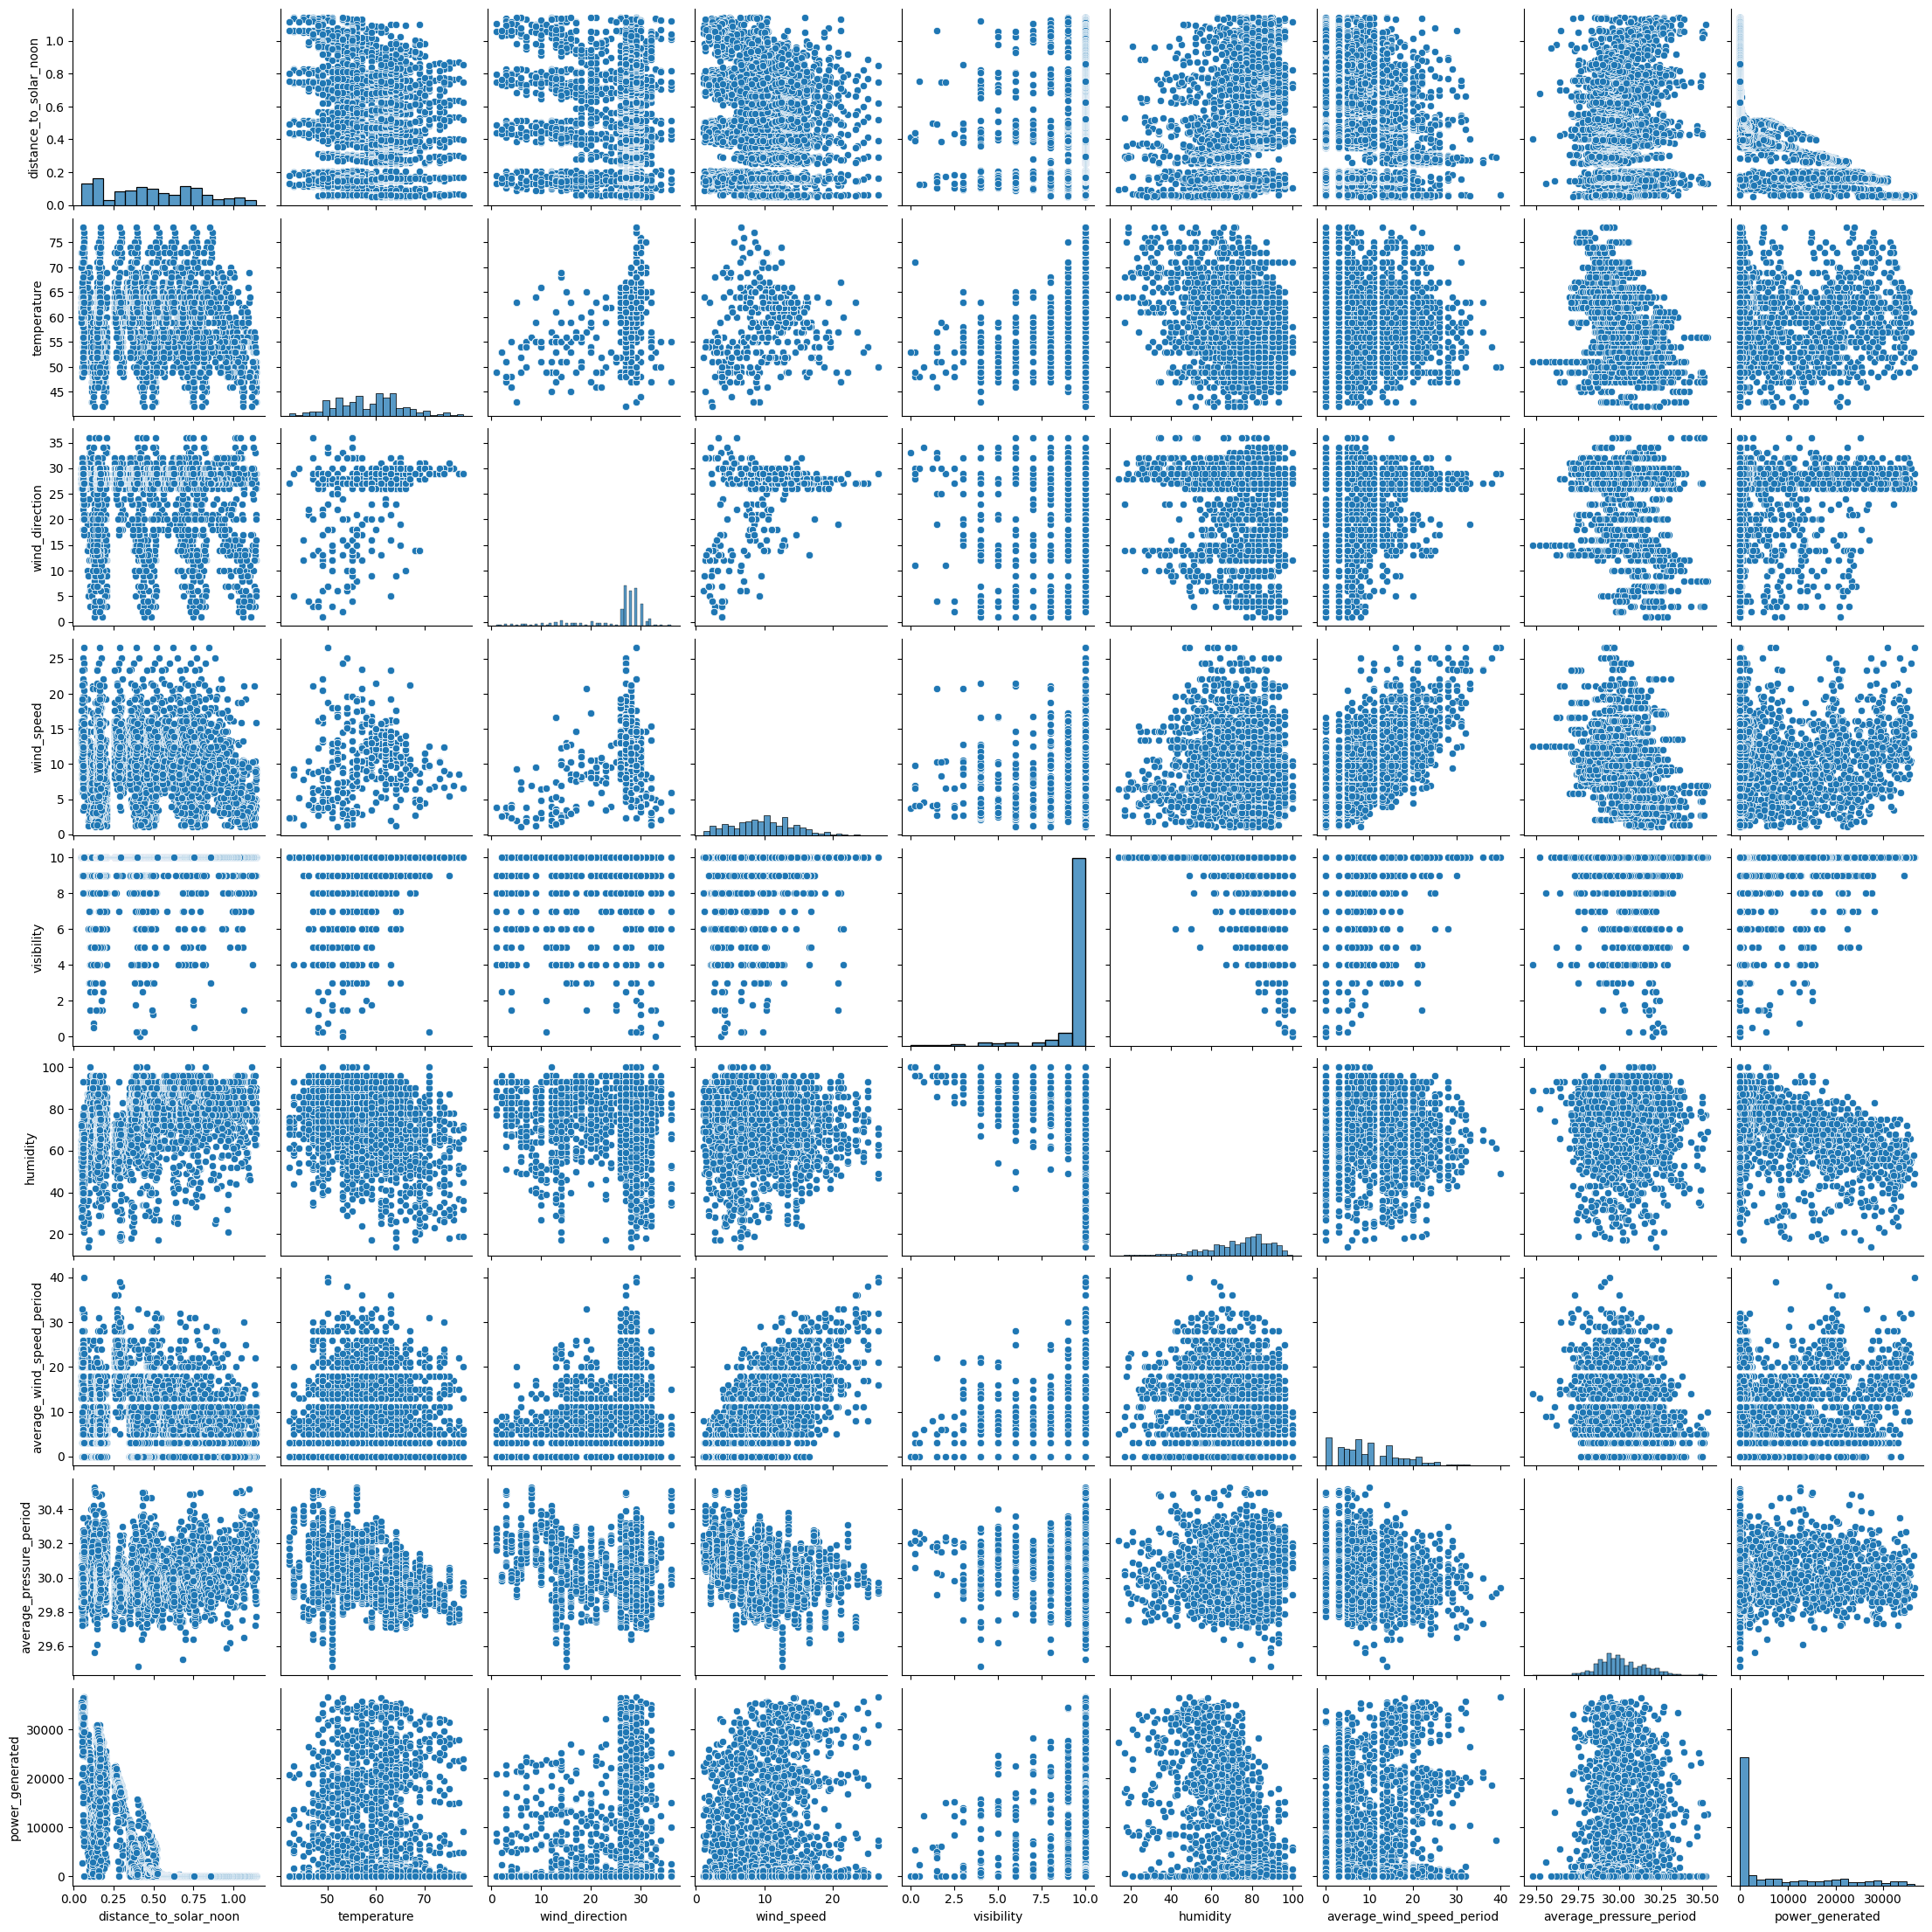

In [18]:
sns.pairplot(data)

In [19]:
data.duplicated().sum() # checking if the data has any duplicate values or not

0

the data has no duplicate values.

**PROCEEDING WITH UNIVARIATE ANALYSIS**

now the missing values are handled, let's check for the ouliers for each dimension.
Since, we need to find the outliers, we would be proceeding with boxplots.

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd0ea2dba0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd0ea2e0e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd0ea2d900>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd0ea2e620>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd0ea2e8c0>],
 'means': []}

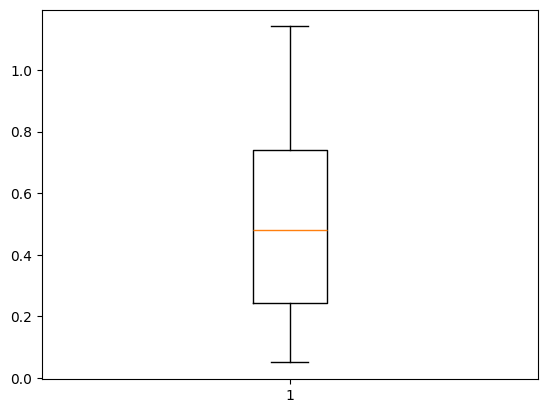

In [20]:
#plotting boxplot for each dimension to look for outliers.
plt.boxplot(data['distance_to_solar_noon'])

<Axes: ylabel='temperature'>

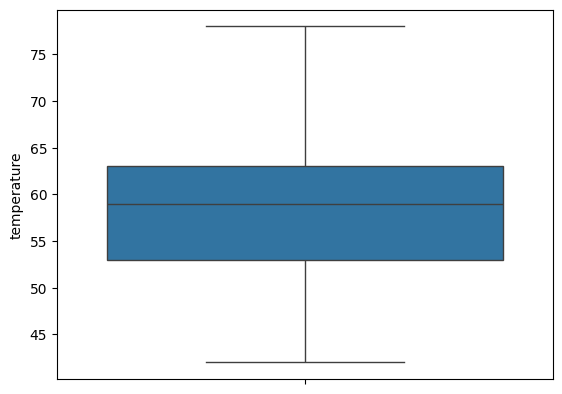

In [21]:
sns.boxplot(data['temperature'])

<Axes: ylabel='average_wind_speed_period'>

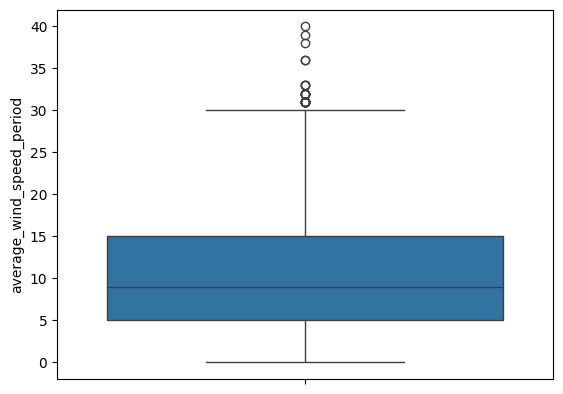

In [22]:
sns.boxplot(data['average_wind_speed_period'])

we can see some outliers in the "average_wind_speed_period" column.

would be dealing with it in a while.

<Axes: ylabel='wind_direction'>

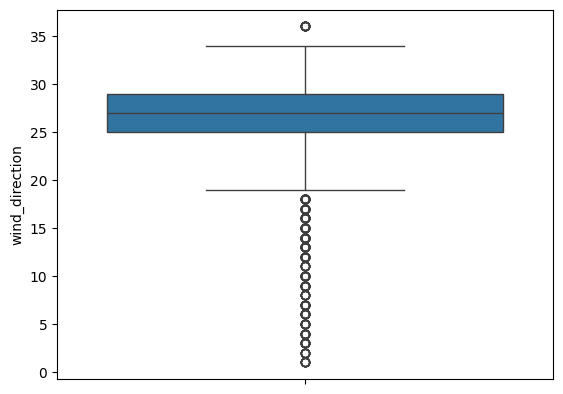

In [23]:
sns.boxplot(data['wind_direction'])

got some in the column "wind_direction" as well.

<Axes: ylabel='wind_speed'>

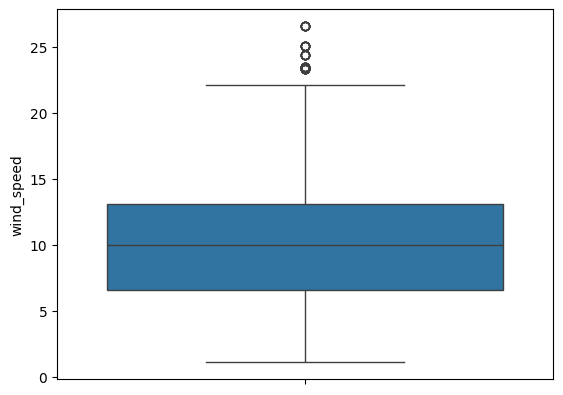

In [24]:
sns.boxplot(data['wind_speed'])

few in "wind_speed" as well.

<Axes: ylabel='visibility'>

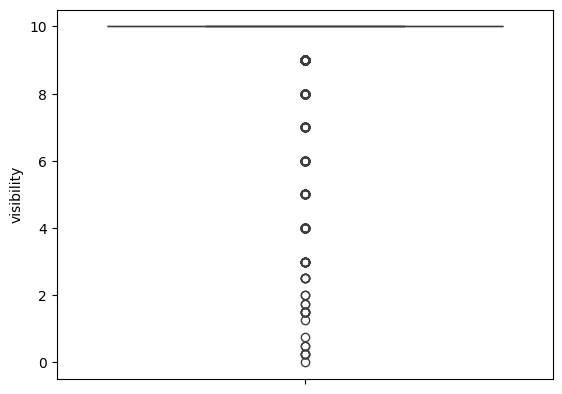

In [25]:
sns.boxplot(data['visibility'])

<Axes: ylabel='humidity'>

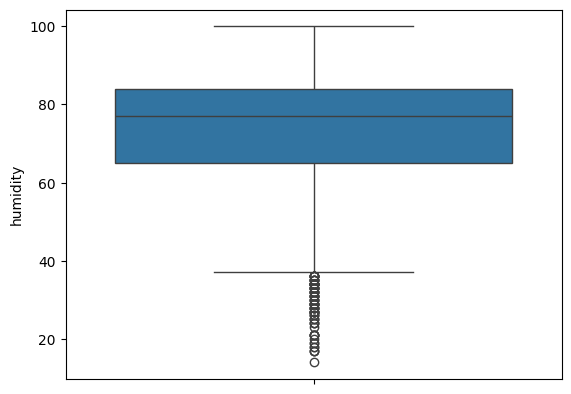

In [26]:
sns.boxplot(data['humidity'])

got some outliers in "humidity" column as well.

<Axes: ylabel='average_pressure_period'>

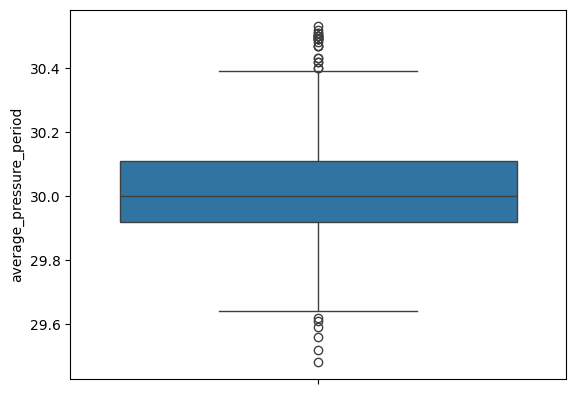

In [27]:
sns.boxplot(data['average_pressure_period'])

and a lot of outliers in average_pressure_period

<Axes: ylabel='power_generated'>

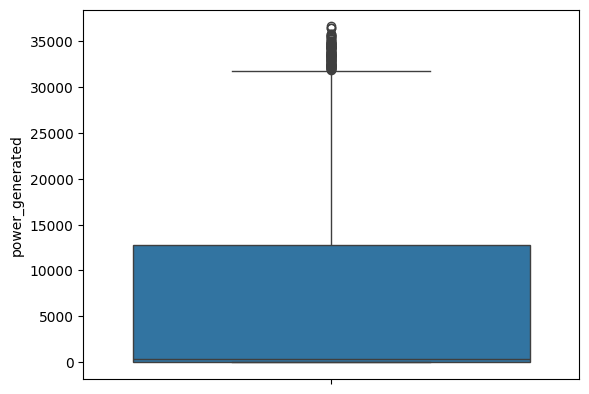

In [28]:
sns.boxplot(data['power_generated'])   #here's our target column

We did univariate analysis by plotting boxplots of each dimensions and got to know that a lot of outliers are there to handle before starting further process.

In [29]:
def remove_outliers_iqr(data):
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = data.copy()

    # Iterate through all numeric columns
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

# Apply the function to the dataset
cleaned_data = remove_outliers_iqr(data)

# Display the size of the cleaned dataset and preview
print(f"Original dataset size: {data.shape}")
print(f"Cleaned dataset size: {cleaned_data.shape}")
cleaned_data.head()


Original dataset size: (2920, 10)
Cleaned dataset size: (2001, 10)


,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
6,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515


after removing outliers, let's see if we can see any outliers in these columns or not.(would be using boxplots again)

<Axes: ylabel='average_pressure_period'>

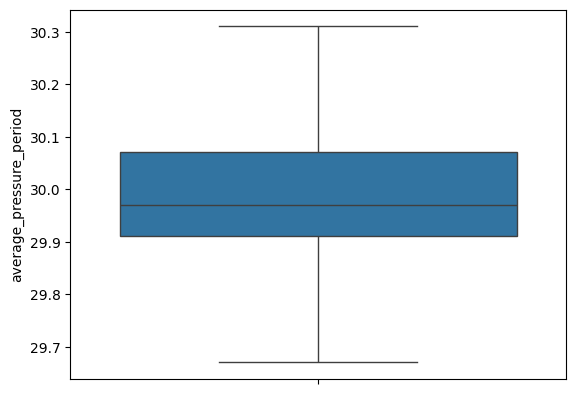

In [30]:
sns.boxplot(cleaned_data['average_pressure_period'])

<Axes: ylabel='power_generated'>

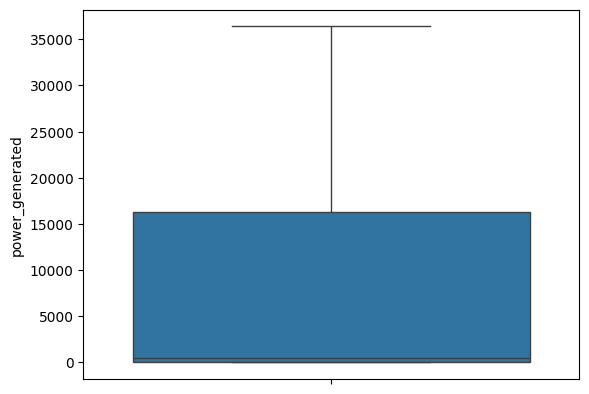

In [31]:
sns.boxplot(cleaned_data['power_generated'])

<Axes: ylabel='visibility'>

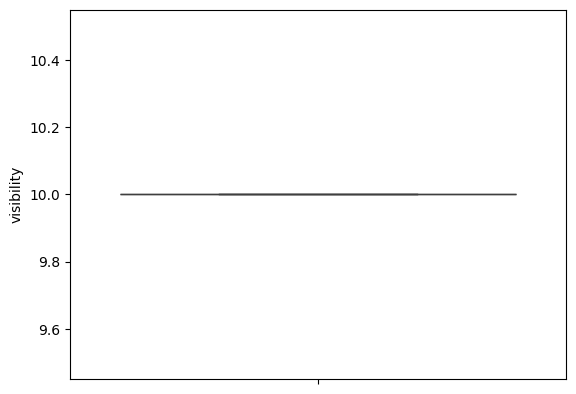

In [32]:
sns.boxplot(cleaned_data['visibility'])

<Axes: ylabel='wind_speed'>

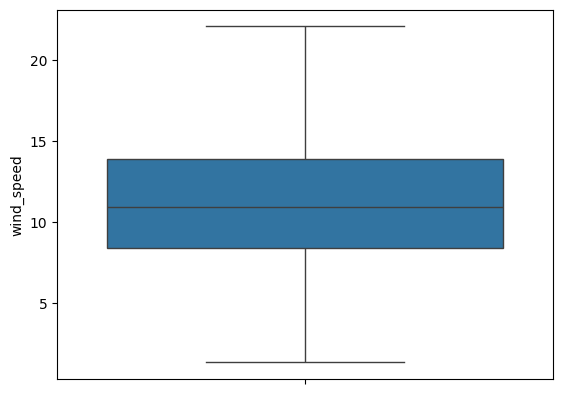

In [33]:
sns.boxplot(cleaned_data['wind_speed'])

we saw some examples after removing the outliers and saw that there isn't any outlier left in the data.

Since we plotted boxplot for analysing the numerical columns, we have one categorical column as well i.e., sky_cover.

Countplot for the sky_cover column.

<Axes: xlabel='sky_cover', ylabel='count'>

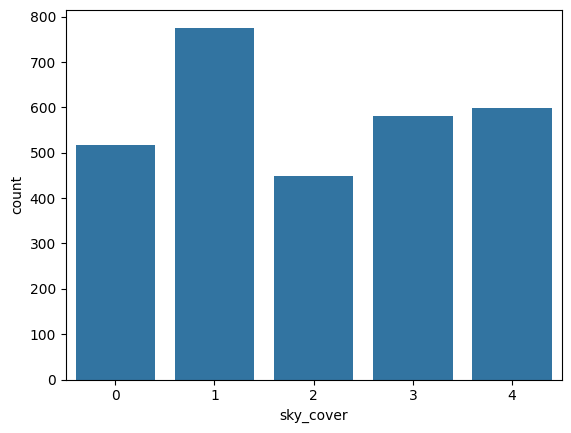

In [34]:
sns.countplot(x='sky_cover',data=data)

In [35]:
cleaned_data.describe()

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.0,2001.000000,2001.000000,2001.000000,2001.000000
mean,0.494981,59.793103,27.696152,11.119540,10.0,72.726637,11.181909,29.993198,7798.990505
std,0.285781,6.632660,2.437136,4.110134,0.0,13.424296,6.979605,0.119114,11046.338814
min,0.050401,42.000000,19.000000,1.300000,10.0,33.000000,0.000000,29.670000,0.000000
25%,0.258174,55.000000,27.000000,8.400000,10.0,64.000000,6.000000,29.910000,0.000000
50%,0.495948,61.000000,28.000000,10.900000,10.0,74.000000,10.000000,29.970000,512.000000
75%,0.719018,64.000000,29.000000,13.900000,10.0,83.000000,16.000000,30.070000,16318.000000
max,1.141361,78.000000,34.000000,22.100000,10.0,100.000000,31.000000,30.310000,36400.000000


Separating the categorical and numerical columns.

In [36]:
cleaned_data.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated'],
      dtype='object')

In [37]:
#separating the independent and dependent variables
X = cleaned_data.iloc[:,0:9]     #independent variable includes the C_col as well.
y = cleaned_data.iloc[:,9:]

In [38]:
X.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period'],
      dtype='object')

In [39]:
y.columns

Index(['power_generated'], dtype='object')

**TRAIN-TEST SPLIT**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period'],
      dtype='object')

In [43]:
y_train.columns

Index(['power_generated'], dtype='object')

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 9), (401, 9), (1600, 1), (401, 1))

After spliting the cleaned data into training and testing sets, let's check for categorical and numerical variables in the training part.
Once we identify the categories in the training and testing sets, we would be solving them separatedly.

for numerical columns, we would be doing standardization.

for categorical columns, we would proceed with dummificaion.

At last we would concatenate the numerical and categorical part to get the final training and testing sets.

In [45]:
cat_cols = ['sky_cover']
num_cols = ['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed','visibility', 'humidity', 'average_wind_speed_period','average_pressure_period']

PERFORMING **DUMMIFICATION** FOR X_train_cat

In [46]:
from sklearn.preprocessing import OneHotEncoder

X_train_cat = pd.get_dummies(X_train[cat_cols]).astype("int64")


In [47]:
X_train_cat

,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
262,0,0,0,0,1
2553,0,1,0,0,0
1293,0,1,0,0,0
520,1,0,0,0,0
2767,0,1,0,0,0
...,...,...,...,...,...
1925,0,0,1,0,0
2144,1,0,0,0,0
1597,0,0,1,0,0
2323,0,1,0,0,0


PERFORMING **DUMMIFICATION** FOR X_test_cat

In [48]:
X_test_cat = pd.get_dummies(X_test[cat_cols]).astype("int64")

In [49]:
X_test_cat

,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
2254,0,0,0,0,1
401,1,0,0,0,0
2193,0,0,0,1,0
1651,0,1,0,0,0
2140,0,1,0,0,0
...,...,...,...,...,...
2134,0,1,0,0,0
1661,0,1,0,0,0
289,0,1,0,0,0
809,0,1,0,0,0


PERFORMING **STANDARDIZATION** FOR X_train_num

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_train_num = scaler.fit_transform(X_train[num_cols])

In [53]:
X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]),columns=X_train[num_cols].columns)

In [54]:
X_train_num

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0.373620,0.779903,-3.513805,-0.649057,0.0,-0.204778,0.387211,-1.960964
1,0.271185,0.328929,0.945274,0.613931,0.0,1.508693,-0.182872,0.129282
2,-0.214407,-1.775615,0.539903,1.221136,0.0,-0.651771,2.097457,0.045672
3,1.592325,-1.023992,0.945274,-1.790604,0.0,0.093217,-0.752954,1.885088
4,0.761128,1.681850,0.539903,0.322472,0.0,0.018718,-0.182872,-0.288768
...,...,...,...,...,...,...,...,...
1595,-0.742259,-0.873668,-0.270838,0.978254,0.0,-1.843751,0.672252,1.467039
1596,0.954357,0.028280,0.945274,0.055301,0.0,0.763705,-0.182872,-1.292086
1597,-0.659201,-0.122045,0.134532,0.298184,0.0,-0.204778,1.812416,-0.205158
1598,-1.217683,0.930227,0.539903,-0.041852,0.0,0.018718,-0.895474,-1.124866


In [55]:
X_train_num.shape

(1600, 8)

PERFORMING **STANDARDIZATION** FOR X_test_num

In [56]:
X_test_num = scaler.transform(X_test[num_cols])

In [57]:
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=X_test[num_cols].columns)

In [58]:
X_test_num

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,-0.103152,0.328929,-0.676209,0.006725,0.0,0.614708,-0.325392,-0.539597
1,0.790856,0.629578,0.134532,-1.742028,0.0,0.987202,-1.180516,1.467039
2,0.216281,0.028280,0.134532,0.249607,0.0,1.508693,-1.180516,-0.623207
3,-1.098733,-0.422694,-0.270838,1.099695,0.0,-0.055781,-0.610433,0.463721
4,-1.523264,0.028280,0.945274,-0.163293,0.0,-1.769252,1.242334,-0.957646
...,...,...,...,...,...,...,...,...
396,-0.064929,-0.573018,0.134532,-0.139005,0.0,0.540209,-0.182872,-0.874036
397,-0.677238,0.328929,0.134532,-0.309022,0.0,-1.545756,0.957293,-0.121548
398,0.685528,0.779903,0.134532,-0.236158,0.0,1.732189,-0.610433,1.048990
399,0.843945,-1.474966,0.539903,-1.523434,0.0,0.763705,-1.608077,1.550649


In [59]:
X_test_num.shape

(401, 8)

CONCATENATING THE CATEGORICAL AND NUMERICAL TRAIN AND TEST SETS TO GET  final_X_train and final_X_test

In [60]:
X_train_num = X_train_num.reset_index()
X_train_num


,index,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0,0.373620,0.779903,-3.513805,-0.649057,0.0,-0.204778,0.387211,-1.960964
1,1,0.271185,0.328929,0.945274,0.613931,0.0,1.508693,-0.182872,0.129282
2,2,-0.214407,-1.775615,0.539903,1.221136,0.0,-0.651771,2.097457,0.045672
3,3,1.592325,-1.023992,0.945274,-1.790604,0.0,0.093217,-0.752954,1.885088
4,4,0.761128,1.681850,0.539903,0.322472,0.0,0.018718,-0.182872,-0.288768
...,...,...,...,...,...,...,...,...,...
1595,1595,-0.742259,-0.873668,-0.270838,0.978254,0.0,-1.843751,0.672252,1.467039
1596,1596,0.954357,0.028280,0.945274,0.055301,0.0,0.763705,-0.182872,-1.292086
1597,1597,-0.659201,-0.122045,0.134532,0.298184,0.0,-0.204778,1.812416,-0.205158
1598,1598,-1.217683,0.930227,0.539903,-0.041852,0.0,0.018718,-0.895474,-1.124866


In [61]:
X_train_num = X_train_num.drop(["index"],axis=1)
X_train_num

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0.373620,0.779903,-3.513805,-0.649057,0.0,-0.204778,0.387211,-1.960964
1,0.271185,0.328929,0.945274,0.613931,0.0,1.508693,-0.182872,0.129282
2,-0.214407,-1.775615,0.539903,1.221136,0.0,-0.651771,2.097457,0.045672
3,1.592325,-1.023992,0.945274,-1.790604,0.0,0.093217,-0.752954,1.885088
4,0.761128,1.681850,0.539903,0.322472,0.0,0.018718,-0.182872,-0.288768
...,...,...,...,...,...,...,...,...
1595,-0.742259,-0.873668,-0.270838,0.978254,0.0,-1.843751,0.672252,1.467039
1596,0.954357,0.028280,0.945274,0.055301,0.0,0.763705,-0.182872,-1.292086
1597,-0.659201,-0.122045,0.134532,0.298184,0.0,-0.204778,1.812416,-0.205158
1598,-1.217683,0.930227,0.539903,-0.041852,0.0,0.018718,-0.895474,-1.124866


In [62]:
X_train_cat = X_train_cat.reset_index()
X_train_cat

,index,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,262,0,0,0,0,1
1,2553,0,1,0,0,0
2,1293,0,1,0,0,0
3,520,1,0,0,0,0
4,2767,0,1,0,0,0
...,...,...,...,...,...,...
1595,1925,0,0,1,0,0
1596,2144,1,0,0,0,0
1597,1597,0,0,1,0,0
1598,2323,0,1,0,0,0


In [63]:
X_train_cat = X_train_cat.reset_index()
X_train_cat

,level_0,index,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,262,0,0,0,0,1
1,1,2553,0,1,0,0,0
2,2,1293,0,1,0,0,0
3,3,520,1,0,0,0,0
4,4,2767,0,1,0,0,0
...,...,...,...,...,...,...,...
1595,1595,1925,0,0,1,0,0
1596,1596,2144,1,0,0,0,0
1597,1597,1597,0,0,1,0,0
1598,1598,2323,0,1,0,0,0


In [64]:
X_train_cat = X_train_cat.drop(['index','level_0'],axis=1)
X_train_cat

,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
1595,0,0,1,0,0
1596,1,0,0,0,0
1597,0,0,1,0,0
1598,0,1,0,0,0


In [65]:
X_test_num = X_test_num.reset_index()
X_test_num

,index,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0,-0.103152,0.328929,-0.676209,0.006725,0.0,0.614708,-0.325392,-0.539597
1,1,0.790856,0.629578,0.134532,-1.742028,0.0,0.987202,-1.180516,1.467039
2,2,0.216281,0.028280,0.134532,0.249607,0.0,1.508693,-1.180516,-0.623207
3,3,-1.098733,-0.422694,-0.270838,1.099695,0.0,-0.055781,-0.610433,0.463721
4,4,-1.523264,0.028280,0.945274,-0.163293,0.0,-1.769252,1.242334,-0.957646
...,...,...,...,...,...,...,...,...,...
396,396,-0.064929,-0.573018,0.134532,-0.139005,0.0,0.540209,-0.182872,-0.874036
397,397,-0.677238,0.328929,0.134532,-0.309022,0.0,-1.545756,0.957293,-0.121548
398,398,0.685528,0.779903,0.134532,-0.236158,0.0,1.732189,-0.610433,1.048990
399,399,0.843945,-1.474966,0.539903,-1.523434,0.0,0.763705,-1.608077,1.550649


In [66]:
X_test_num = X_test_num.drop(['index'],axis = 1)
X_test_num

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,-0.103152,0.328929,-0.676209,0.006725,0.0,0.614708,-0.325392,-0.539597
1,0.790856,0.629578,0.134532,-1.742028,0.0,0.987202,-1.180516,1.467039
2,0.216281,0.028280,0.134532,0.249607,0.0,1.508693,-1.180516,-0.623207
3,-1.098733,-0.422694,-0.270838,1.099695,0.0,-0.055781,-0.610433,0.463721
4,-1.523264,0.028280,0.945274,-0.163293,0.0,-1.769252,1.242334,-0.957646
...,...,...,...,...,...,...,...,...
396,-0.064929,-0.573018,0.134532,-0.139005,0.0,0.540209,-0.182872,-0.874036
397,-0.677238,0.328929,0.134532,-0.309022,0.0,-1.545756,0.957293,-0.121548
398,0.685528,0.779903,0.134532,-0.236158,0.0,1.732189,-0.610433,1.048990
399,0.843945,-1.474966,0.539903,-1.523434,0.0,0.763705,-1.608077,1.550649


In [67]:
X_test_cat = X_test_cat.reset_index()
X_test_cat

,index,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,2254,0,0,0,0,1
1,401,1,0,0,0,0
2,2193,0,0,0,1,0
3,1651,0,1,0,0,0
4,2140,0,1,0,0,0
...,...,...,...,...,...,...
396,2134,0,1,0,0,0
397,1661,0,1,0,0,0
398,289,0,1,0,0,0
399,809,0,1,0,0,0


In [68]:
X_test_cat = X_test_cat.reset_index()
X_test_cat

,level_0,index,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,2254,0,0,0,0,1
1,1,401,1,0,0,0,0
2,2,2193,0,0,0,1,0
3,3,1651,0,1,0,0,0
4,4,2140,0,1,0,0,0
...,...,...,...,...,...,...,...
396,396,2134,0,1,0,0,0
397,397,1661,0,1,0,0,0
398,398,289,0,1,0,0,0
399,399,809,0,1,0,0,0


In [69]:
X_test_cat = X_test_cat.drop(['index','level_0'],axis=1)
X_test_cat

,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
396,0,1,0,0,0
397,0,1,0,0,0
398,0,1,0,0,0
399,0,1,0,0,0


In [70]:
final_X_train = pd.concat([X_train_num,X_train_cat],axis=1)
final_X_train

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0.373620,0.779903,-3.513805,-0.649057,0.0,-0.204778,0.387211,-1.960964,0,0,0,0,1
1,0.271185,0.328929,0.945274,0.613931,0.0,1.508693,-0.182872,0.129282,0,1,0,0,0
2,-0.214407,-1.775615,0.539903,1.221136,0.0,-0.651771,2.097457,0.045672,0,1,0,0,0
3,1.592325,-1.023992,0.945274,-1.790604,0.0,0.093217,-0.752954,1.885088,1,0,0,0,0
4,0.761128,1.681850,0.539903,0.322472,0.0,0.018718,-0.182872,-0.288768,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.742259,-0.873668,-0.270838,0.978254,0.0,-1.843751,0.672252,1.467039,0,0,1,0,0
1596,0.954357,0.028280,0.945274,0.055301,0.0,0.763705,-0.182872,-1.292086,1,0,0,0,0
1597,-0.659201,-0.122045,0.134532,0.298184,0.0,-0.204778,1.812416,-0.205158,0,0,1,0,0
1598,-1.217683,0.930227,0.539903,-0.041852,0.0,0.018718,-0.895474,-1.124866,0,1,0,0,0


In [71]:
final_X_test = pd.concat([X_test_num,X_test_cat],axis=1)
final_X_test

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,sky_cover_0,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,-0.103152,0.328929,-0.676209,0.006725,0.0,0.614708,-0.325392,-0.539597,0,0,0,0,1
1,0.790856,0.629578,0.134532,-1.742028,0.0,0.987202,-1.180516,1.467039,1,0,0,0,0
2,0.216281,0.028280,0.134532,0.249607,0.0,1.508693,-1.180516,-0.623207,0,0,0,1,0
3,-1.098733,-0.422694,-0.270838,1.099695,0.0,-0.055781,-0.610433,0.463721,0,1,0,0,0
4,-1.523264,0.028280,0.945274,-0.163293,0.0,-1.769252,1.242334,-0.957646,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,-0.064929,-0.573018,0.134532,-0.139005,0.0,0.540209,-0.182872,-0.874036,0,1,0,0,0
397,-0.677238,0.328929,0.134532,-0.309022,0.0,-1.545756,0.957293,-0.121548,0,1,0,0,0
398,0.685528,0.779903,0.134532,-0.236158,0.0,1.732189,-0.610433,1.048990,0,1,0,0,0
399,0.843945,-1.474966,0.539903,-1.523434,0.0,0.763705,-1.608077,1.550649,0,1,0,0,0


# MODEL BUILDING

IMPLEMENTING LINEAR REGRESSION WITH AND WITHOUT PARAMETERS.

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
#here we ain't giving any parameters
model_1 = LinearRegression()
model_1.fit(final_X_train, y_train)

LinearRegression()

In [74]:
#evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = model_1.predict(final_X_train)
y_pred_test = model_1.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 5797.130833299318
r2_train: 0.7241392553690623
rmse_test: 6025.286655812458
r2_test: 0.7035758798659262


In [75]:
#including some parameters
model_2 = LinearRegression(fit_intercept=False, n_jobs=-1)
model_2.fit(final_X_train,y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

In [76]:
#evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = model_2.predict(final_X_train)
y_pred_test = model_2.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 5797.130833299317
r2_train: 0.7241392553690624
rmse_test: 6025.286655812457
r2_test: 0.7035758798659262


RANDOM FOREST

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
model_3 = RandomForestRegressor(n_estimators=100,max_depth=None, max_features='sqrt', random_state=42)
model_3.fit(final_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features='sqrt', random_state=42)

In [79]:
predictions = model_3.predict(final_X_test)

In [80]:
#evaluation
y_pred_train = model_3.predict(final_X_train)
y_pred_test = model_3.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 1234.4879520887648
r2_train: 0.9874905731474133
rmse_test: 3103.675408915329
r2_test: 0.9213478311494101


ADA BOOST

In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model_4 = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    learning_rate=1.0,
    loss='linear',
    random_state=42
)

In [82]:
model_4.fit(final_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [83]:
#evaluation
y_pred_train = model_4.predict(final_X_train)
y_pred_test = model_4.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 3552.75468902771
r2_train: 0.8963917965981609
rmse_test: 3900.333252591446
r2_test: 0.8757885751399105


XG-BOOST

In [84]:
import xgboost as xgb
#XGBoost regressor
model_5 = xgb.XGBRegressor(
    n_estimators=100,     # Number of trees
    max_depth=3,          # Maximum depth of a tree
    learning_rate=0.1,    # Step size shrinkage
    subsample=0.8,        # Fraction of samples used per tree
    colsample_bytree=0.8, # Fraction of features used per tree
    random_state=42       # For reproducibility
)



In [85]:
# Fit the model
model_5.fit(final_X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [86]:
# Make predictions
y_pred = model_5.predict(final_X_test)

In [87]:
# Evaluate the model
y_pred_train = model_5.predict(final_X_train)
y_pred_test = model_5.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 2403.7883732743358
r2_train: 0.9525696635246277
rmse_test: 2992.384762033226
r2_test: 0.9268872737884521


In [88]:
import pickle

In [89]:
print('saving model as pkl file.......')
pickle.dump(model_5, open('Power_Generation.pkl','wb'))


saving model as pkl file.......
